In [388]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения 

## 0. Описание задачи
Таблица содержит данные о 11914 автомобилях и 16 признаков:

- `Make` - марка авто
- `Model` - модель авто
- `Year` - год выпуска автомобиля
- `Engine Fuel Type` - тип топлива двигателя
- `Engine HP` - мощность двигателя
- `Engine Cylinders` - количество цилиндров в двигателе
- `Transmission Type` - тип трансмиссии
- `Driven_Wheels` - ведущие колеса
- `Number of Doors` - количество дверей
- `Market Category` - категория рынка
- `Vehicle Size` - размер автомобиля
- `Vehicle Style` - тип кузова автомобиля
- `highway MPG` - расход топлива по шоссе
- `city mpg` - расход топлива по городу
- `Popularity` - популярность
- `MSRP` - рекомендованная производителем рыночная цина

Постановка задачи:

Требуется предсказать категориальный признак `Engine Cylinders`, представленный в числовом виде (количество цилиндров в двигателе) по остальным признакам. Это задача классификации.

## 1. Загружаем данные

In [389]:
url = "https://raw.githubusercontent.com/kirrealdev/MachineLearningCourseUNN/master/data.csv"
data = pd.read_csv(url)

Этот метод отображает первые строки (по умолчанию, 5 строк) таблицы:

In [390]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Метод data.tail() отображает последние строки (по умолчанию, 5 строк) таблицы:

In [391]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


C помощью метода columns можем получить имена признаков:

In [392]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


Анализ признаков: 
- Признаки: `Engine Cylinders`, `Number of Doors` - категориальные, представлены в числовом виде.
- Признаки: `Make`, `Model`, `Engine Fuel Type`, `Transmission Type`, `Driven_Wheels`, `Market Category`, `Vehicle Size`, `Vehicle Style` - категориальные представленные в виде букв либо букв + чисел.
- Признаки: `Year`, `Engine HP`, `highway MPG`, `city mpg`, `Popularity`, `MSRP` - числовые.


In [393]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [394]:
data.index

RangeIndex(start=0, stop=11914, step=1)

In [395]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Столбцы `Make`, `Model`, `Engine Fuel Type`, `Transmission Type`, `Driven_Wheels`, `Market Category`, `Vehicle Size`, `Vehicle Style` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [396]:
data['Make'] = data['Make'].astype('category')
data['Model'] = data['Model'].astype('category')
data['Engine Fuel Type'] = data['Engine Fuel Type'].astype('category')
data['Transmission Type'] = data['Transmission Type'].astype('category')
data['Driven_Wheels'] = data['Driven_Wheels'].astype('category')
data['Market Category'] = data['Market Category'].astype('category')
data['Vehicle Size'] = data['Vehicle Size'].astype('category')
data['Vehicle Style'] = data['Vehicle Style'].astype('category')

data['Vehicle Style'] = data['Vehicle Style'].astype('category')

In [397]:
data.dtypes

Make                 category
Model                category
Year                    int64
Engine Fuel Type     category
Engine HP             float64
Engine Cylinders      float64
Transmission Type    category
Driven_Wheels        category
Number of Doors       float64
Market Category      category
Vehicle Size         category
Vehicle Style        category
highway MPG             int64
city mpg                int64
Popularity              int64
MSRP                    int64
dtype: object

### Доступ к отдельным элементам и выделение подтаблиц (slice)

In [398]:
data.at [3, 'Vehicle Style']

'Coupe'

In [399]:
data.iat [4,5]

6.0

In [400]:
data['Make']

0            BMW
1            BMW
2            BMW
3            BMW
4            BMW
          ...   
11909      Acura
11910      Acura
11911      Acura
11912      Acura
11913    Lincoln
Name: Make, Length: 11914, dtype: category
Categories (48, object): [Acura, Alfa Romeo, Aston Martin, Audi, ..., Tesla, Toyota, Volkswagen, Volvo]

In [401]:
data.loc[[2,3,5,189,235], ['Make', 'Year', 'MSRP']]

,Make,Year,MSRP
2,BMW,2011,36350
3,BMW,2011,29450
5,BMW,2012,31200
189,Mercedes-Benz,1993,2187
235,Chrysler,2003,32315


In [402]:
data.iloc[[2,3,5], [6,10,15]]

,Transmission Type,Vehicle Size,MSRP
2,MANUAL,Compact,36350
3,MANUAL,Compact,29450
5,MANUAL,Compact,31200


In [403]:
data.loc[[2, 5], :]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200


### Доступ по булевой маске

In [404]:
df = data.iloc[:4, 2:9]
df

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0


In [405]:
df.loc[[True, True, False, True], [False, True, True, True, True, True, False]]

,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels
0,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive
1,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive
3,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive


In [406]:
df[[False, True, False, True]]

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0


In [407]:
df.loc[df.Year  == 2011, ]

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0


## 2. Боремся с выбросами (outliers)

Понятно, что количество цилиндров зависит от количества лошадиных сил двигателя.
Построим поэтому диаграмму рассеивания для двух признаков: `Engine HP` и `Engine Cylinders`.


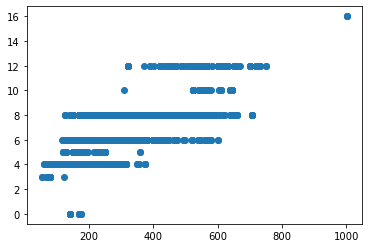

In [408]:
plt.scatter(data['Engine HP'], data['Engine Cylinders'])
pass

In [409]:
data['Engine Cylinders'].max()

16.0

In [410]:
data['Engine Cylinders'].min()

0.0

In [411]:
data['Engine HP'].max()

1001.0

In [412]:
data['Engine HP'].min()

55.0

Мы видим точки соответствующие машинам с чрезмерно большим количеством цилиндров и чрезмерно большим количеством лошадиных сил двигателя. Например, более 14 цилиндров и более 1000 л.c. Это *выбросы* (*outliers*) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем, например, квантили для признаков `Engine Cylinders` и `Engine HP`:

In [413]:
data['Engine Cylinders'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     3.0
0.010     4.0
0.050     4.0
0.100     4.0
0.500     6.0
0.900     8.0
0.950     8.0
0.990    12.0
0.995    12.0
Name: Engine Cylinders, dtype: float64

Мы видим, например, что  99.9%  всех значений признака 'Engine Cylinders' находится в диапазоне от  3.0  до 12.0 (это значения квантилей, соответствующих уровням  0.005  и  0.995  соотвтетственно)

In [414]:
data['Engine HP'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     79.0
0.010     90.0
0.050    118.0
0.100    138.0
0.500    227.0
0.900    385.0
0.950    460.0
0.990    620.0
0.995    645.0
Name: Engine HP, dtype: float64

Мы видим, например, что $99.9\%$ всех значений признака `'Engine HP'` находится в диапазоне от $79.0$ до $645.0$ л.с. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

In [415]:
rows_to_drop = data[
    (data['Engine HP'] < data['Engine HP'].quantile(0.005)) | (data['Engine HP'] > data['Engine HP'].quantile(0.995)) | 
    (data['Engine Cylinders']  < data['Engine Cylinders' ].quantile(0.005)) | (data['Engine Cylinders']  > data['Engine Cylinders' ].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(11744, 16)

In [416]:
rows_to_drop

Int64Index([  539,   540,   541,   622,  1469,  1470,  1471,  1472,  1473,
             1474,
            ...
             9854,  9867,  9868,  9869,  9870,  9871,  9872, 11362, 11363,
            11364],
           dtype='int64', length=170)

Мы избавились от 170 выбросов.

## 3. Визуализация и описательная статистика

Визуализация и описательная статистика - важные этапы анализа данных.
Сводную информацию о признаках можем получить, вызвав метод `describe`:

In [417]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11744.000000,11718.000000,11716.000000,11744.000000,11744.000000,11744.000000,11744.000000,1.174400e+04
mean,2010.391349,248.296552,5.645442,3.442524,26.261325,19.262602,1551.111546,3.937409e+04
std,7.549701,104.471822,1.709534,0.877841,7.218922,6.131782,1439.350064,4.917091e+04
min,1990.000000,79.000000,3.000000,2.000000,12.000000,8.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.106500e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.998250e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.200250e+04
max,2017.000000,645.000000,12.000000,4.000000,354.000000,128.000000,5657.000000,1.382750e+06


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках. Получим информацию о категориальных:

In [418]:
data.describe(include=['category'])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11744,11744,11741,11744,11744,8023,11744,11744
unique,46,894,10,5,4,70,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1095,156,7115,8250,4704,1108,4645,3021


### Построим все возможные диаграммы рассеивания для каждой пары переменных:

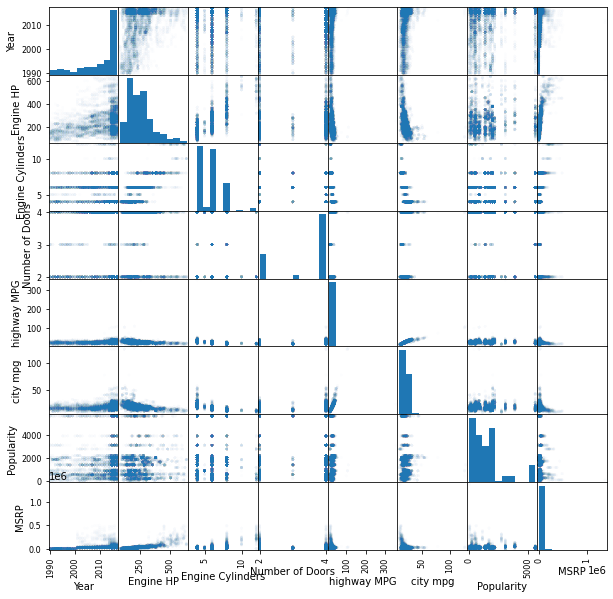

In [419]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

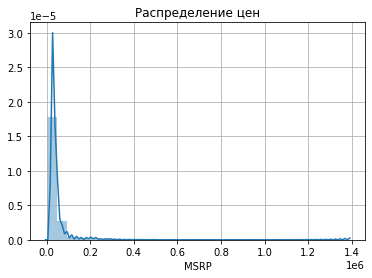

In [420]:
sns.distplot(data['MSRP'], bins=30)
plt.grid()
plt.title('Распределение цен')
pass

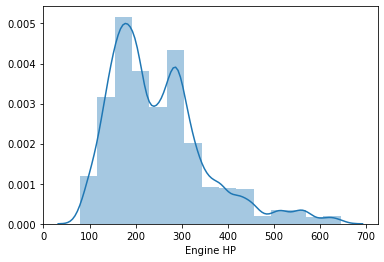

In [421]:
sns.distplot(data['Engine HP'], bins = 15)
pass

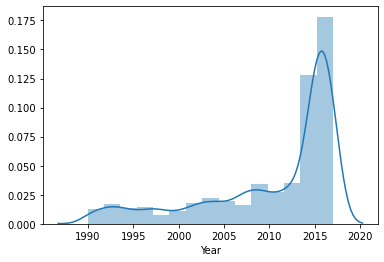

In [422]:
sns.distplot(data['Year'], bins = 15)
pass

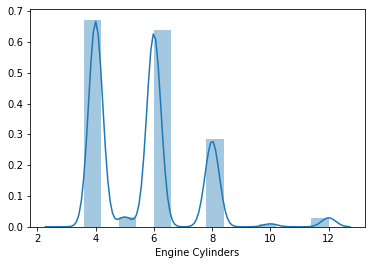

In [423]:
sns.distplot(data['Engine Cylinders'], bins = 15)
pass

### Ящик с усами

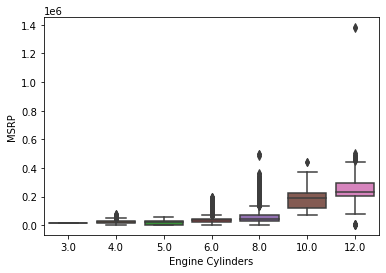

In [424]:
sns.boxplot(x="Engine Cylinders", y="MSRP", data=data)
pass

### Скрипичный график

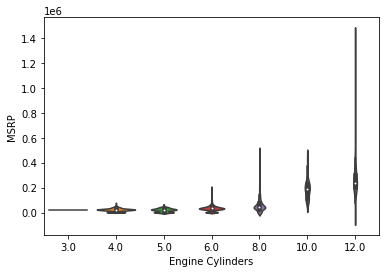

In [425]:
sns.violinplot(x="Engine Cylinders", y="MSRP", data=data)
pass

### Корреляционная матрица

In [426]:
corr_mat = data.corr()
corr_mat

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.352688,-0.045805,0.262884,0.298891,0.257351,0.077658,0.273445
Engine HP,0.352688,1.000000,0.775016,-0.083212,-0.414849,-0.485703,0.037429,0.707393
Engine Cylinders,-0.045805,0.775016,1.000000,-0.125037,-0.622579,-0.684134,0.045744,0.566808
Number of Doors,0.262884,-0.083212,-0.125037,1.000000,0.118669,0.138354,-0.045967,-0.116363
highway MPG,0.298891,-0.414849,-0.622579,0.118669,1.000000,0.837596,-0.038812,-0.207681
city mpg,0.257351,-0.485703,-0.684134,0.138354,0.837596,1.000000,-0.024486,-0.246734
Popularity,0.077658,0.037429,0.045744,-0.045967,-0.038812,-0.024486,1.000000,-0.055342
MSRP,0.273445,0.707393,0.566808,-0.116363,-0.207681,-0.246734,-0.055342,1.000000


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

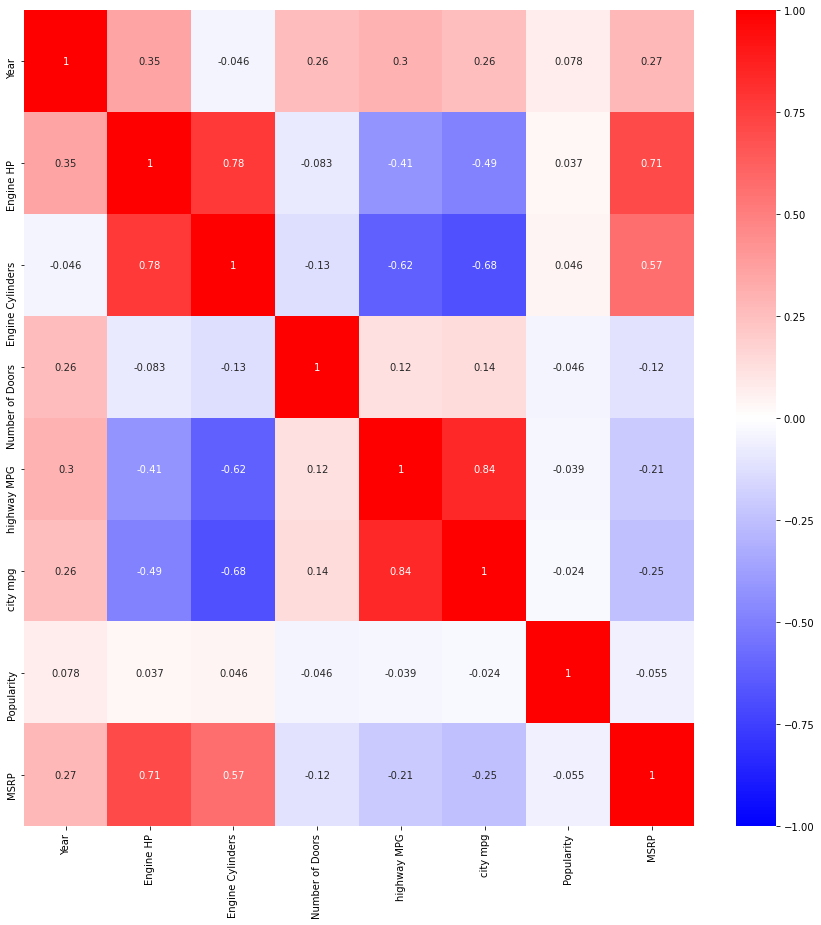

In [427]:
# sns.heatmap(corr_mat, square=True, cmap='coolwarm')
# pass
plt.rcParams['figure.figsize'] = (15, 15)

sns.heatmap(corr_mat, center=0, annot=True, cmap='bwr', vmin=-1, vmax=1,
        xticklabels=corr_mat.columns,
        yticklabels=corr_mat.columns)

In [428]:
corr_mat > 0.5

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,True,False,False,False,False,False,False,False
Engine HP,False,True,True,False,False,False,False,True
Engine Cylinders,False,True,True,False,False,False,False,True
Number of Doors,False,False,False,True,False,False,False,False
highway MPG,False,False,False,False,True,True,False,False
city mpg,False,False,False,False,True,True,False,False
Popularity,False,False,False,False,False,False,True,False
MSRP,False,True,True,False,False,False,False,True


In [429]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

highway MPG       city mpg            0.837596
Engine HP         Engine Cylinders    0.775016
                  MSRP                0.707393
Engine Cylinders  MSRP                0.566808
dtype: float64

Коэффициенты корреляции `highway MPG` и `city mpg` близок к 1, т.е. между этими признаками наблюдается положительная корреляция.

Наблюдается высокая степень связи между `Engine HP` и `MSRP`, `Engine HP` и `Engine Cylinders`, а так же между `Engine Cylinders` и `MSRP`

In [430]:
corr_mat.loc['Year', 'Number of Doors'],corr_mat.loc['Number of Doors', 'city mpg']

(0.2628835063362246, 0.1383538122602926)

Коэффициенты корреляции между `Year` и `Number of Doors`, а также между `Number of Doors` и `city mpg` весьма малы, что вполне объяснимо предметной областью.

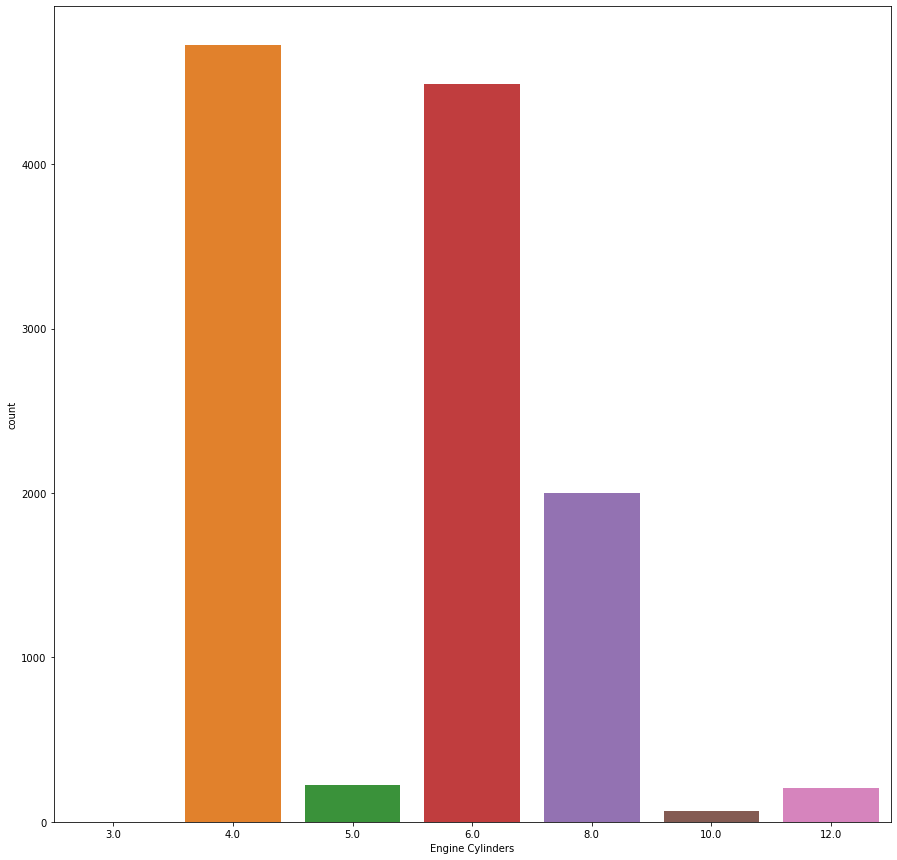

In [431]:
sns.countplot(x='Engine Cylinders', data=data)
pass

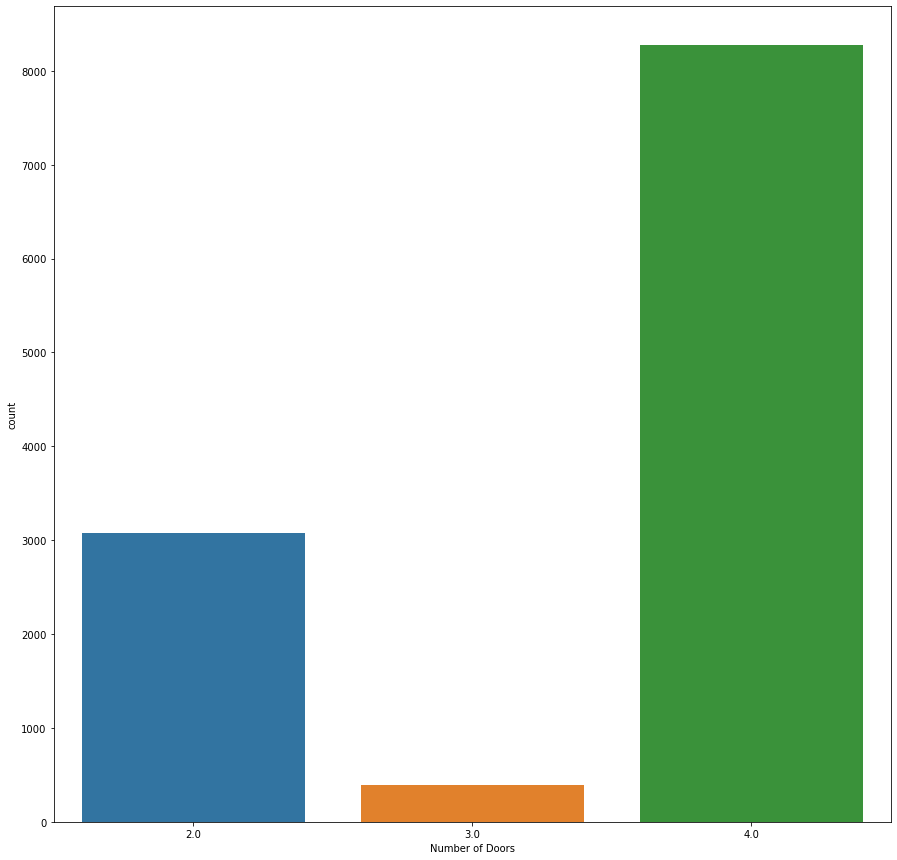

In [432]:
sns.countplot(x='Number of Doors', data=data)
pass

In [433]:
data['Make'].value_counts()

Chevrolet        1095
Ford              861
Volkswagen        809
Toyota            744
Dodge             620
Nissan            548
GMC               515
Honda             445
Mazda             423
Cadillac          397
Mercedes-Benz     350
Suzuki            347
BMW               330
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Acura             252
Subaru            246
Kia               226
Lexus             202
Buick             196
Mitsubishi        194
Chrysler          187
Pontiac           177
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            61
Scion              60
FIAT               59
Maserati           58
Lamborghini        38
Rolls-Royce        31
Lotus              29
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker              3
Genesis   

##  4. Заполнение пропущенных значений 

Пропущенные значения в таблице представлены значениями np.nan. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [434]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              26
Engine Cylinders       28
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3721
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

С пропущенными значениями надо что-то сделать. Например, можно просто удалить строки с пропущенными значениями. В нашем случае это разумно, так как таких строк немного. В некоторых случаях можно удалить столбцы с пропущенными значениями. Однако если данных мало такие простые стратегии могут привести к тому, что данных станет вообще ничтожное количество.

Простая разумная стратегия - заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

Удалим столбец 'Market Category'

In [435]:
data=data.drop(data.columns[[9]], axis='columns')

In [436]:
data.shape

(11744, 15)

Строки с пропущенными значениями в столбцах `Engine Fuel Type`, `Engine HP`, `Engine Cylinders`, `Number of Doors` удалим, количество данных от этого изменится не сильно: 

In [437]:
data = data.dropna(subset=['Engine Fuel Type']) 
data = data.dropna(subset=['Engine HP'])
data = data.dropna(subset=['Engine Cylinders']) 
data = data.dropna(subset=['Number of Doors'])

In [438]:
data.isna().sum()  

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [439]:
data.shape

(11688, 15)

В итоге, количество данных об автомобилях уменьшилось всего на 56.

## 5. Векторизация

In [440]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,1.168800e+04
mean,2010.387320,248.416410,5.646133,3.440366,26.214408,19.194387,1551.024726,3.940660e+04
std,7.556069,104.555537,1.710912,0.878834,6.950021,5.512235,1436.469926,4.927995e+04
min,1990.000000,79.000000,3.000000,2.000000,12.000000,8.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.103875e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.205000e+04
max,2017.000000,645.000000,12.000000,4.000000,354.000000,58.000000,5657.000000,1.382750e+06


In [441]:
data.describe(include=['category'])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11688,11688,11688,11688,11688,11688,11688
unique,46,888,8,5,4,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1087,156,7098,8215,4674,4614,3004


Удалим столбецы `Make` и `Model` и  поскольку в них много, а именно 46 и 888 уникальных значений.

In [442]:
data.drop(['Make'], axis='columns', inplace=True)
data.drop(['Model'], axis='columns', inplace=True)

Проведем векторизацию категориальных (номинальных) признаков:

In [443]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
numerical_columns= ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


In [444]:
data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= []
nonbinary_columns= ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']


К небинарными признакам применим метод векторизации, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `Driven_Wheels` принимает 4 различных значений: 

In [445]:
data['Driven_Wheels'].unique()

[rear wheel drive, front wheel drive, all wheel drive, four wheel drive]
Categories (4, object): [rear wheel drive, front wheel drive, all wheel drive, four wheel drive]

Заменим признак `Driven_Wheels` на 4 признака: Driven_Wheels_rear_wheel_drive, Driven_Wheels_front_wheel_drive, Driven_Wheels_all_wheel_drive, Driven_Wheels_four_wheel_drive.

Если признак `Driven_Wheels` принимает значение rear wheel drive, то признак Driven_Wheels_rear_wheel_drive равен 1, а все остальные равны 0.
Если признак `Driven_Wheels` принимает значение front wheel drive, то признак Driven_Wheels_front_wheel_drive равен 1, а все остальные равны 0. и т.д.

Такую векторизацию осуществляет в pandas метод get_dummies.

In [446]:
data[categorical_columns]

,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
0,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
1,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
2,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
3,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
4,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
...,...,...,...,...,...
11909,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11910,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11911,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11912,premium unleaded (recommended),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback


In [447]:
data_categorical = pd.get_dummies(data[nonbinary_columns])
print(data_categorical.columns)

Index(['Engine Fuel Type_diesel', 'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/natural gas)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Compact',
       'Vehicle Size_Large', 'Vehicle Size_Midsize',
       'Vehicle Style_2dr Hatchback', 'Vehicle Style_2dr SUV',
       'Vehicle S

In [448]:
len(data_categorical.columns)

38

## 6. Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

Не будем нормализовать целевой признак `Driven_Wheels`

In [449]:
numerical_columns_without_Driven_Wheels = ['Year', 'Engine HP', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

In [450]:
data_numerical_without_Driven_Wheels = data[numerical_columns_without_Driven_Wheels]
data_numerical_without_Driven_Wheels.describe()

,Year,Engine HP,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,1.168800e+04
mean,2010.387320,248.416410,3.440366,26.214408,19.194387,1551.024726,3.940660e+04
std,7.556069,104.555537,0.878834,6.950021,5.512235,1436.469926,4.927995e+04
min,1990.000000,79.000000,2.000000,12.000000,8.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,2.000000,22.000000,16.000000,549.000000,2.103875e+04
50%,2015.000000,227.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,4.000000,30.000000,22.000000,2009.000000,4.205000e+04
max,2017.000000,645.000000,4.000000,354.000000,58.000000,5657.000000,1.382750e+06


In [451]:
data_numerical_without_Driven_Wheels = (data_numerical_without_Driven_Wheels - data_numerical_without_Driven_Wheels.mean(axis = 0))/data_numerical_without_Driven_Wheels.std(axis = 0)

In [452]:
data_numerical_without_Driven_Wheels.describe()

,Year,Engine HP,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04
mean,6.975607e-15,-1.075790e-16,1.277070e-14,1.768762e-15,2.252144e-15,1.675308e-15,-4.245976e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.698139e+00,-1.620349e+00,-1.638952e+00,-2.045232e+00,-2.030826e+00,-1.078355e+00,-7.590633e-01
25%,-4.482914e-01,-7.499977e-01,-1.638952e+00,-6.063878e-01,-5.795086e-01,-6.975605e-01,-3.727246e-01
50%,6.104603e-01,-2.048329e-01,6.367916e-01,-3.084997e-02,-2.166793e-01,-1.155783e-01,-1.914897e-01
75%,7.428042e-01,4.933607e-01,6.367916e-01,5.446879e-01,5.089792e-01,3.188200e-01,5.364043e-02
max,8.751482e-01,3.793042e+00,6.367916e-01,4.716325e+01,7.039906e+00,2.858379e+00,2.725943e+01


## Соединяем все в одну таблицу

In [453]:
data = pd.concat((data['Engine Cylinders'], data_numerical_without_Driven_Wheels, data_categorical), axis = 1)
print(data.shape)

(11688, 46)


In [454]:
data.describe()

,Engine Cylinders,Year,Engine HP,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Engine Fuel Type_diesel,Engine Fuel Type_electric,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
count,11688.000000,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,1.168800e+04,11688.000000,11688.0,...,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000
mean,5.646133,6.975607e-15,-1.075790e-16,1.277070e-14,1.768762e-15,2.252144e-15,1.675308e-15,-4.245976e-16,0.013090,0.0,...,0.066307,0.002139,0.098477,0.058265,0.053303,0.035250,0.010951,0.033539,0.257016,0.050222
std,1.710912,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.113667,0.0,...,0.248829,0.046201,0.297971,0.234254,0.224646,0.184419,0.104079,0.180046,0.437007,0.218413
min,3.000000,-2.698139e+00,-1.620349e+00,-1.638952e+00,-2.045232e+00,-2.030826e+00,-1.078355e+00,-7.590633e-01,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,-4.482914e-01,-7.499977e-01,-1.638952e+00,-6.063878e-01,-5.795086e-01,-6.975605e-01,-3.727246e-01,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.104603e-01,-2.048329e-01,6.367916e-01,-3.084997e-02,-2.166793e-01,-1.155783e-01,-1.914897e-01,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,7.428042e-01,4.933607e-01,6.367916e-01,5.446879e-01,5.089792e-01,3.188200e-01,5.364043e-02,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12.000000,8.751482e-01,3.793042e+00,6.367916e-01,4.716325e+01,7.039906e+00,2.858379e+00,2.725943e+01,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Отбор признаков 

Для классификации автомобилей по признаку обозначенному `Driven_Wheels`, будем использовать все входные признаки.

### X и y

In [455]:
# X - вся таблица без столбца Driven_Wheels
# y - только столбец Driven_Wheels
X = data.drop('Engine Cylinders', axis = 1) # выбрасываем столбец 'Driven_Wheels'
y = data['Engine Cylinders']
feature_names = X.columns

In [456]:
type(feature_names)

pandas.core.indexes.base.Index

In [457]:
feature_names
# д.б. все колонки, кроме Driven_Wheels

Index(['Year', 'Engine HP', 'Number of Doors', 'highway MPG', 'city mpg',
       'Popularity', 'MSRP', 'Engine Fuel Type_diesel',
       'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/natural gas)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Compact',
       'Vehicle Size_Large', '

In [458]:
X = X.to_numpy()

In [459]:
y = y.to_numpy()

In [460]:
print(y)

[6. 6. 6. ... 6. 6. 6.]


In [461]:
print(X.shape)
print(y.shape)
N, d = X.shape

(11688, 45)
(11688,)


In [462]:
type(X)

numpy.ndarray

In [463]:
type(y)

numpy.ndarray

## 8. Разбиваем на тренировочную и тестовую выборки

In [464]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# тестовая выборка - 30% данных
# random_state фиксирует split

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

8181 3507
X_train:  (8181, 45)
X_test:   (3507, 45)
y_train:  (8181,)
y_test:   (3507,)


### kNN

In [465]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import parallel_backend
from sklearn.metrics import f1_score
from tqdm import tqdm

target_names = ['Flop', 'Hit']

y_train_pred = []
y_test_pred = []

iter_ = range(1, 37, 2)

for n_neig in tqdm(iter_):
    neigh = KNeighborsClassifier(n_neighbors=n_neig)
    neigh.fit(X_train, y_train)
    
    y_train_pred.append(neigh.predict(X_train))
    y_test_pred.append(neigh.predict(X_test))


100%|██████████| 18/18 [01:05<00:00,  3.66s/it]


'best number of neighbors: 1'

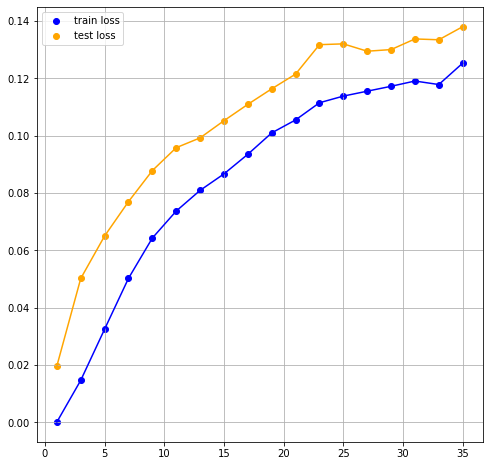

In [466]:
plt.rcParams['figure.figsize'] = (8, 8)

res_train = []
res_test = []

for i in range(len(iter_)):
    res_train.append(np.mean(y_train != y_train_pred[i]))
    res_test.append(np.mean(y_test != y_test_pred[i]))

plt.scatter(list(iter_)[::-1], res_train[::-1], color='blue', label='train loss')
plt.scatter(list(iter_)[::-1], res_test[::-1], color='orange', label='test loss')

plt.plot(list(iter_)[::-1], res_train[::-1], color='blue')
plt.plot(list(iter_)[::-1], res_test[::-1], color='orange')

plt.grid()
plt.legend()
f"best number of neighbors: {np.argmin(res_test)*2 + 1}"

In [485]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
f", error: {np.mean(y_test != y_pred):.3f}"

', error: 0.020'

Также построим матрицу ошибок(confusion matrix) для лучшего случая (один сосед):

In [468]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred[0])

array([[   0,    1,    0,    0,    0,    0,    0],
       [   0, 1389,    1,   13,    0,    0,    0],
       [   0,    4,   57,    5,    0,    0,    0],
       [   0,   14,    7, 1290,    5,    0,    0],
       [   0,    0,    2,   10,  630,    0,    3],
       [   0,    0,    0,    1,    0,   21,    0],
       [   0,    0,    0,    0,    3,    0,   51]])

На диагонали представлены "большие" значения, соответствующие тому, что метод сделал правильный прогноз.
Ошибок мало.

Из собранных предсказанний на тестовой выборки найдем оптимальное количество ближайших соседей.
Оптимальным является 1 ближайший сосед. Получили, что ошибка на тестовой выборке = 0.011690903906472769, а ошибка на обучающей выборке = 0.0, что можно считать очень хорошим результатом.

### Random forest

In [494]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
print(y_train_predict)
y_test_predict = rf.predict(X_test)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

[6. 4. 4. ... 4. 4. 4.]
0.0001222344456667889 0.01454234388366125
[[   0    1    0    0    0    0    0]
 [   0 1391    0   12    0    0    0]
 [   0    5   57    4    0    0    0]
 [   0    2    0 1308    6    0    0]
 [   0    0    0   14  629    0    2]
 [   0    0    0    0    1   21    0]
 [   0    0    0    0    4    0   50]]


### SVC

In [470]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)
print(confusion_matrix(y_test, y_test_predict))

0.0847084708470847 0.0872540633019675
[[   0    1    0    0    0    0    0]
 [   0 1340    0   63    0    0    0]
 [   0   40    0   26    0    0    0]
 [   0   34    0 1241   39    2    0]
 [   0    0    0   71  561    0   13]
 [   0    0    0    1    2   18    1]
 [   0    0    0    0   13    0   41]]


In [471]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000, tol=1e-3, alpha=0.001, random_state=42)

clf.fit(X_train, y_train)

у_pred = clf.predict(X_test)
f" error: {np.mean(y_test != у_pred):.3f}"

' error: 0.140'

## Общие выводы

В результате был проанализирован датасет The Spotify Hit Predictor, визуализированы данные.

1.Отсутсвует сильная корреляция признаков и результирующей метки.
2.Некоторые признаки содержали выбросы, поэтому было проведено удаление выбросов.
3.Обработаны категориальные признаки.
4.Проведена нормализация признаков, для наилучшей работы алгоритмов машинного обучения.
5.Обучено несколько различных классификаторов с разными параметрами, а именно линейная классификация, метод ближайших - соседей, метод опорных векторов.
6.Наилучшая достигнутая точность была получена на методе опорных векторов и равна примерно 80%, при наилучшей точности для метода ближайших соседе.

## PCA

Применим алгоритм PCA для сокращения размерности пространства признаков.

In [472]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_proj = pca.transform(X)
print(X.shape)
print(X_proj.shape)

(11688, 45)
(11688, 2)


In [473]:
print("Главные компоненты (по строкам):")
print(pca.components_)
print("Дисперсии по главным компонентам, собственные значения вдоль каждой компоненты:")
print(pca.explained_variance_)
print("Среднеквадратические отклонения:")
print(np.sqrt(pca.explained_variance_))
print("Соответствующие сингулярные значения:")
print(pca.singular_values_)

Главные компоненты (по строкам):
[[-2.91354129e-03 -5.00952710e-01  1.33014538e-01  4.70193879e-01
   5.02015984e-01 -3.06455834e-02 -3.89131119e-01  7.89361547e-03
  -2.91924755e-25 -4.50709564e-04 -5.57817865e-03 -2.47608518e-02
  -0.00000000e+00  1.54802810e-04  7.40615331e-03 -9.89277887e-02
   1.14262957e-01 -3.52471788e-03 -3.08593156e-02  2.81873335e-04
   3.43146776e-02 -2.12517384e-04 -2.93801448e-02 -4.36224899e-02
   1.89031007e-01 -1.16028372e-01  9.33249159e-02 -1.04580174e-01
   1.12552583e-02  1.92787134e-02 -2.39259973e-03  3.99292607e-02
  -1.87349296e-02  1.08956778e-03 -3.37148586e-03 -2.37025725e-02
   2.44173345e-04 -3.55089146e-02 -2.07946133e-02 -1.37397155e-02
   7.01265668e-04 -5.94960134e-03 -8.62005286e-03  5.75631394e-02
   1.40083650e-02]
 [ 6.53521677e-01  3.12511576e-01  3.26090459e-01  3.02249471e-01
   2.57991940e-01 -3.18979983e-03  3.38815332e-01  7.81714622e-03
  -7.70628048e-24  3.70321319e-04  3.92618964e-03  8.91369344e-03
  -0.00000000e+00  1.043

In [474]:
y_names = np.unique(y)
K = len(y_names)
print(y_names)

[ 3.  4.  5.  6.  8. 10. 12.]


In [475]:
y1 = y.reshape(y.shape[0], 1)
pca_data = np.concatenate([X_proj, y1], axis=1)

             x1        x2 class
0     -0.985695 -0.437414   6.a
1     -0.627576 -0.477359   6.a
2     -0.514355 -0.475521   6.a
3     -0.306628 -0.825794   6.a
4     -0.334698 -0.775673   6.a
...         ...       ...   ...
11683 -0.897706  0.601796   6.a
11684 -0.981013  0.674331   6.a
11685 -0.933240  0.632735   6.a
11686 -0.829660  0.702751   6.a
11687  0.364662 -0.303794   6.a

[11688 rows x 3 columns]


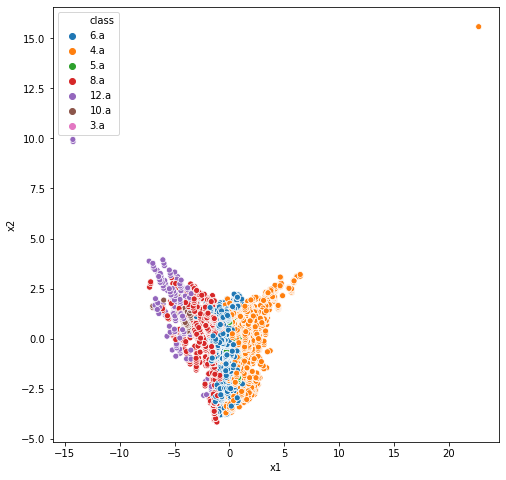

In [476]:
df = pd.DataFrame(data = pca_data, columns=["x1", 'x2', 'class'])
df.loc[df['class'] == 3, 'class'] = '3.a'
df.loc[df['class'] == 4, 'class'] = '4.a'
df.loc[df['class'] == 5, 'class'] = '5.a'
df.loc[df['class'] == 6, 'class'] = '6.a'
df.loc[df['class'] == 8, 'class'] = '8.a'
df.loc[df['class'] == 10, 'class'] = '10.a'
df.loc[df['class'] == 12, 'class'] = '12.a'
sns.scatterplot(data=df, x="x1", y="x2", hue="class")
print(df)

Index(['Engine Cylinders', 'Year', 'Engine HP', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP',
       'Engine Fuel Type_diesel', 'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/natural gas)',
       'Engine Fuel Type_natural gas',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Compact',
       'Ve

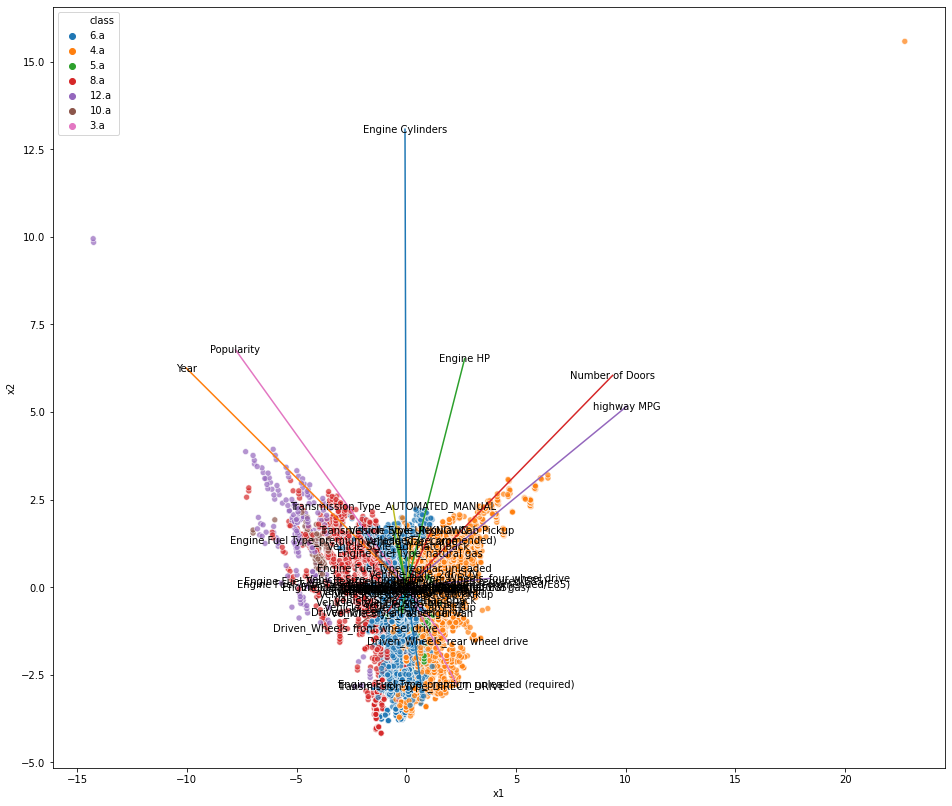

In [477]:
def component_plot(draw, coeff, labels):
    plt.figure(figsize=(16,14))
#     draw = pd.concat([Xx, y], axis=1, join='inner')
    sns.scatterplot(data=draw, x='x1', y='x2', hue='class', alpha=0.7)
    for i in range(0, len(coeff[0])):
        plt.text(coeff[0, i]*20, coeff[1, i]*20, labels[i], color='black', ha='center', va='center')
        plt.plot([0, coeff[0, i]*20], [0, coeff[1, i]*20])
    
    
component_plot(df, pca.components_, data.columns)
print(data.columns)

### LDA

In [478]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [479]:
lda = LDA(n_components=2)
lda.fit(X_train, y_train.ravel())

X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [480]:
# data_x_lda = np.array(data.drop(['class'], axis=1))
# data_y_lda = np.array(data['class'])

# from sklearn.model_selection import train_test_split
# _, _, y_train2, y_test2 = train_test_split(data_x_lda, data_y_lda, test_size = 0.25, random_state = 42)

In [481]:
y_train_pd = y_train.reshape(y_train.shape[0], 1)
cat = np.concatenate([X_train_lda, y_train_pd], axis=1)

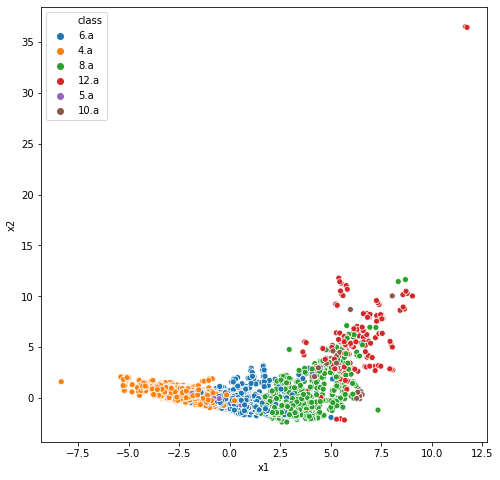

In [483]:
plt.rcParams['figure.figsize'] = (8, 8)

df = pd.DataFrame(data=cat, columns=["x1", 'x2', 'class'])
df.loc[df['class'] == 3, 'class'] = '3.a'
df.loc[df['class'] == 4, 'class'] = '4.a'
df.loc[df['class'] == 5, 'class'] = '5.a'
df.loc[df['class'] == 6, 'class'] = '6.a'
df.loc[df['class'] == 8, 'class'] = '8.a'
df.loc[df['class'] == 10, 'class'] = '10.a'
df.loc[df['class'] == 12, 'class'] = '12.a'
sns.scatterplot(data=df, x="x1", y="x2", hue="class")

In [491]:
from sklearn import ensemble
from tqdm import tqdm

acc_train = []
acc_test = []

for i in tqdm(range(1, 46)):
    pca = PCA(n_components=i)
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    clf = ensemble.RandomForestClassifier(n_estimators = 1000)
    clf.fit(X_train_pca, y_train.ravel())
    
    у_pred_train = clf.predict(X_train_pca)
    у_pred_test = clf.predict(X_test_pca)
    
    acc_train.append(np.mean(y_train != у_pred_train))
    acc_test.append(np.mean(y_test != у_pred_test))

100%|██████████| 45/45 [31:39<00:00, 42.22s/it]


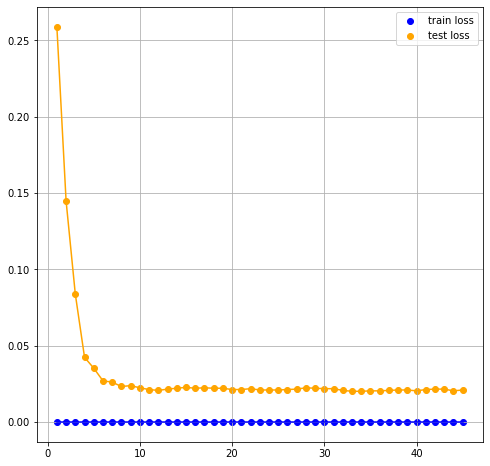

In [492]:
plt.scatter(range(1,46), acc_train, label='train loss', color='blue')
plt.scatter(range(1,46), acc_test, label='test loss', color='orange')

plt.plot(range(1,46), acc_train, color='blue')
plt.plot(range(1,46), acc_test, color='orange')
plt.legend()
plt.grid()